In [30]:
from rdkit import Chem
import matplotlib.pyplot as plt

In [4]:
supp = Chem.SDMolSupplier('../data/drugbank.sdf')

In [8]:
mols = [mol for mol in supp if mol]

RDKit ERROR: [12:33:06] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:33:49] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:33:49] ERROR: Could not sanitize molecule ending on line 20009
[12:33:06] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:33:49] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:33:49] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:33:49] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:33:49] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:33:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:33:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:33:50] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:33:50] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERR

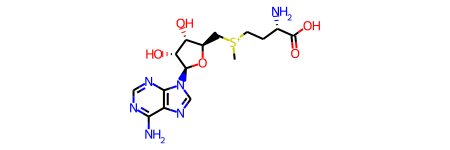

In [17]:
m = mols[11]
m

In [18]:
rings = Chem.GetSymmSSSR(m)
print(len(rings))

3


In [20]:
Chem.GetSSSR(m)

3

In [23]:
rings_all = []
for i in mols:
    rings_all.append(Chem.GetSSSR(i))

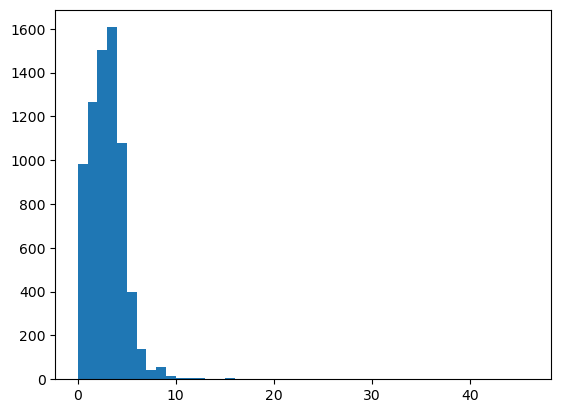

In [37]:
plt.hist(rings_all, 46)
plt.show()

In [68]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

weights = []
don =[]
ace = []
logp = []
for i in mols:
    weights.append(Descriptors.ExactMolWt(i))
    don.append(Lipinski.NumHDonors(i))
    ace.append(Lipinski.NumHAcceptors(i))
    logp.append(Descriptors.MolLogP(i))

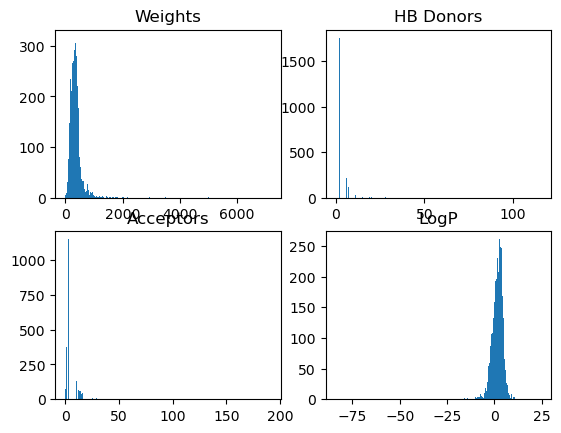

In [75]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(weights, 500)
axs[0, 0].set_title('Weights')
axs[0, 1].hist(don, 500)
axs[0, 1].set_title('HB Donors')
axs[1, 0].hist(ace, 500)
axs[1, 0].set_title('Acceptors')
axs[1, 1].hist(logp, 500)
axs[1, 1].set_title('LogP')

plt.show()

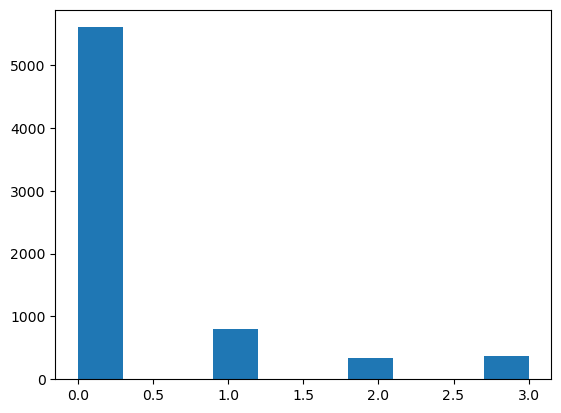

In [85]:
viol = []
for i in zip(weights, ace, don, logp):
    count = 0
    if i[0] >= 500:
        count += 1
    if i[1] >= 10:
        count += 1
    if i[2] >= 5:
        count += 1
    if i[3] > 50:
        count += 1
    viol.append(count)

plt.hist(viol)
plt.show()